In [187]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ID3 Algo

In [253]:
treeGraph = nx.Graph()

In [198]:
def new_node(node):
    global treeGraph
    if node not in treeGraph.nodes():
        treeGraph.add_node(node)
        print("\nadding ", node , "as new node\n")

In [243]:
def new_edge(node1,node2):
    global treeGraph
    treeGraph.add_edge(node1,node2)
    print("\nadding edge", node1 , " --> ", node2)

In [3]:
def most_freq_value(data,attr):
    return data[attr].describe()["top"]
    

In [4]:
def entropy_calc(data,targetAttribute):
    
    totalPop = len(data[targetAttribute])
    prob = data[targetAttribute].value_counts()/totalPop
    entropy = prob.map(lambda x : -1*x*math.log2(x)).sum()
    
    
    # returning entropy
    return entropy,totalPop
    

In [5]:
def info_gain(data,targetAttribute,feature):
    """returns the info gain"""
    childNodes = data[feature].unique()
    childEntropy = {}
    splitEntropy = 0
    #calculate entropy of parent node
    parentEntropy,parentPop = entropy_calc(data,targetAttribute)
    
    #calculate entropy of each child
    for child in childNodes:
        childData = data[data[feature]==child]
        childEntropy[child] = entropy_calc(childData,targetAttribute)
    
    # calculating entropy of the split
    for child2 in childEntropy.keys():
        splitEntropy += (childEntropy[child2][0]*childEntropy[child2][1]/parentPop)
    
    return parentEntropy-splitEntropy
        
    

In [6]:
def best_attribute_func(data,targetAttribute,attributes,choice_func):
    # for all possible splits/attributes calculate the metric given by the choice function.
    metric = {}
    for feature in attributes:
        metric[choice_func(data,targetAttribute,feature)] = feature
    
    #return the feature with the highest value(infoGain)
    return metric[sorted(metric,reverse=True)[0]]
        
    
        
    

In [248]:
def ID3(data,targetAttribute,attributes,choice_func,last_node="root"):
    """Returns a decision tree  """
    global treeGraph
    data = data[:]
    targetVals = data[targetAttribute]
    
    freqVals = most_freq_value(data,targetAttribute)
    
    
    # Recursion Stop 1
    # if dataset is empty or list of attributes is empty,
    # return the most frequent values of the targetAttribute
    if len(data)==0 or (len(attributes)-1) <= 0:
        new_node(freqVals)
        new_edge(last_node,freqVals)
        return freqVals
    
    # Recursion Stop 2
    # if all values have same classification,
    # return the node root value
    elif len(targetVals.unique()) == 1:
        label = targetVals.unique()[0]
        new_node(label)
        new_edge(last_node,freqVals)
        return label
    
    
    #otherwise create a new decision tree :
    
    else :
        # find the best attribute to split the data,
        # on grounds of max info gain
        bestAttr = best_attribute_func(data,targetAttribute,attributes,choice_func)
        new_node(bestAttr)
        new_edge(last_node,bestAttr)
        
        #adding node to the graph
        
        tree = {bestAttr : {}}
        
        # creating a decision tree/node for all unique values of the bestAttr
        for value in data[bestAttr].unique():
            print("\n",bestAttr,"\t",value)
            
            
            new_node(value)
            new_edge(bestAttr,value)
            last_node = value
            
            subtree = ID3(data[data[bestAttr] == value],\
                          targetAttribute,\
                          attributes.difference([bestAttr]),\
                          choice_func,last_node)
            print("Subtree : \t",subtree)
            tree[bestAttr][value] = subtree
           
    return tree
        
    
    
    

In [241]:
def ID3_fit(X_train,y_train):
    """ID3(data,targetAttribute,attributes,choice_func=info_gain)"""
    data = pd.concat([X_train,y_train],axis=1)
    return ID3(data,targetAttribute=list(y_train.columns)[0],attributes=X_train.columns,choice_func=info_gain)
    

### loading data  and testing

### Test 1

In [9]:
cd ID3/

/home/muhabek/Documents/mlData/datasets/ML algo code/ID3


In [10]:

testData = pd.read_csv("data.csv")

In [11]:
testData.columns.difference(["Age"])

Index(['Education', 'Income', 'Marital Status', 'Purchase?'], dtype='object')

In [12]:
testData

,Age,Education,Income,Marital Status,Purchase?
0,36-55,master's,high,single,will buy
1,18-35,high school,low,single,won't buy
2,36-55,master's,low,single,will buy
3,18-35,bachelor's,high,single,won't buy
4,< 18,high school,low,single,will buy
5,18-35,bachelor's,high,married,won't buy
6,36-55,bachelor's,low,married,won't buy
7,> 55,bachelor's,high,single,will buy
8,36-55,master's,low,married,won't buy
9,> 55,master's,low,married,will buy


In [13]:
info_gain(testData,targetAttribute="Purchase?",feature="Marital Status")

0.1024101186092029

In [14]:
info_gain(testData,targetAttribute="Purchase?",feature="Age")

0.45143261817650915

In [15]:
info_gain(testData,targetAttribute="Purchase?",feature="Education")

0.143546524122519

In [16]:
info_gain(testData,targetAttribute="Purchase?",feature="Income")

0.03030514483932223

In [17]:
best_attribute_func(testData,targetAttribute="Purchase?",attributes=testData.columns.difference(["Purchase?"]),choice_func=info_gain)

'Age'

In [18]:
ID3(testData,targetAttribute="Purchase?",attributes=testData.columns.difference(["Purchase?"]),choice_func=info_gain)

Index(['Age', 'Education', 'Income', 'Marital Status'], dtype='object') 

 Age 36-55
Index(['Education', 'Income', 'Marital Status'], dtype='object') 

 Marital Status single
all values have same label


 will buy 


Index(['Education', 'Income', 'Marital Status'], dtype='object') 

 Marital Status married
all values have same label


 won't buy 




 {'Marital Status': {'married': "won't buy", 'single': 'will buy'}} 


Index(['Age', 'Education', 'Income', 'Marital Status'], dtype='object') 

 Age 18-35
all values have same label


 won't buy 


Index(['Age', 'Education', 'Income', 'Marital Status'], dtype='object') 

 Age < 18
Index(['Education', 'Income', 'Marital Status'], dtype='object') 

 Income low
all values have same label


 will buy 


Index(['Education', 'Income', 'Marital Status'], dtype='object') 

 Income high
all values have same label


 won't buy 




 {'Income': {'low': 'will buy', 'high': "won't buy"}} 


Index(['Age', 'Education', 'Income', 'Marital Status'], dtype

{'Age': {'18-35': "won't buy",
  '36-55': {'Marital Status': {'married': "won't buy", 'single': 'will buy'}},
  '< 18': {'Income': {'high': "won't buy", 'low': 'will buy'}},
  '> 55': 'will buy'}}

## <span style="color:blue"> Test 2</span>

In [202]:
ls

data.csv  ID3Tree.dot  train.csv*  Untitled.ipynb


In [203]:
df = pd.read_csv("train.csv")

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


##### <span style="color:green">for testing purposes we will use the gender,age,occupation,city_category, stay_in_city , marital status, and convert purchase into a categorical variable based on the median</span>

In [205]:
df.Purchase.median()

8047.0

In [206]:
def purchaseFunc(x,check):
    if x >= check:
        return True
    else :
        return False
    
    

In [207]:
med = df.Purchase.median()

In [208]:
df["Purchase_cat"] = df["Purchase"].map(lambda x : purchaseFunc(x,med))

In [210]:
df["married"] = df["Marital_Status"].map(lambda x : "married_"+str(x))

In [211]:
df["occupation"] = df["Occupation"].map(lambda x : "occ_"+str(x))

In [209]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Purchase_cat'],
      dtype='object')

In [212]:
df = df.drop(["Product_ID","Product_Category_1","Product_Category_2",\
              "Product_Category_3","Purchase","Marital_Status","Occupation"],axis=1)

In [213]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Purchase_cat', 'married', 'occupation'],
      dtype='object')

In [214]:
id_var = ["User_ID"]
target_var =["Purchase_cat"]
features = df.columns.difference(id_var+target_var)

In [217]:
features

Index(['Age', 'City_Category', 'Gender', 'Stay_In_Current_City_Years',
       'married', 'occupation'],
      dtype='object')

In [219]:
X_train, X_test, y_train, y_test = train_test_split(df[features],df[target_var],test_size = 0.25)

#### <span style="color:green"> this creates a decision tree in the form of a dictionary of dictionaries</span>
* it also produces a graph of all connections in the decision tree

In [254]:
ID3_tree = ID3_fit(X_train,y_train)


adding  City_Category as new node


adding edge root  -->  City_Category

 City_Category 	 A

adding  A as new node


adding edge City_Category  -->  A

adding  occupation as new node


adding edge A  -->  occupation

 occupation 	 occ_2

adding  occ_2 as new node


adding edge occupation  -->  occ_2

adding  Age as new node


adding edge occ_2  -->  Age

 Age 	 26-35

adding  26-35 as new node


adding edge Age  -->  26-35

adding  Stay_In_Current_City_Years as new node


adding edge 26-35  -->  Stay_In_Current_City_Years

 Stay_In_Current_City_Years 	 4+

adding  4+ as new node


adding edge Stay_In_Current_City_Years  -->  4+

adding  married as new node


adding edge 4+  -->  married

 married 	 married_1

adding  married_1 as new node


adding edge married  -->  married_1

adding  False as new node


adding edge married_1  -->  False
Subtree : 	 False

 married 	 married_0

adding  married_0 as new node


adding edge married  -->  married_0

adding  True as new node


adding edge

## Drawing a graph

In [251]:
len(treeGraph.nodes())

51

In [255]:
treeGraph.edges()


[(False, '4+'),
 (False, '18-25'),
 (False, 'M'),
 (False, '26-35'),
 (False, '2'),
 (False, '1'),
 (False, 'F'),
 (False, '0-17'),
 (False, '36-45'),
 (False, 'married_1'),
 (False, '55+'),
 (False, '51-55'),
 (False, '0'),
 (False, 'married_0'),
 (False, '3'),
 (False, '46-50'),
 ('4+', True),
 ('4+', 'Age'),
 ('4+', 'married'),
 ('4+', 'Gender'),
 ('4+', 'Stay_In_Current_City_Years'),
 ('City_Category', 'B'),
 ('City_Category', 'A'),
 ('City_Category', 'C'),
 ('City_Category', 'root'),
 (True, '18-25'),
 (True, '3'),
 (True, '51-55'),
 (True, '2'),
 (True, '1'),
 (True, 'F'),
 (True, '0-17'),
 (True, '36-45'),
 (True, 'married_1'),
 (True, '55+'),
 (True, '26-35'),
 (True, '0'),
 (True, 'married_0'),
 (True, 'M'),
 (True, '46-50'),
 ('0', 'Age'),
 ('0', 'married'),
 ('0', 'Gender'),
 ('0', 'Stay_In_Current_City_Years'),
 ('occ_11', 'Stay_In_Current_City_Years'),
 ('occ_11', 'Age'),
 ('occ_11', 'occupation'),
 ('occ_18', 'Stay_In_Current_City_Years'),
 ('occ_18', 'Age'),
 ('occ_18', 

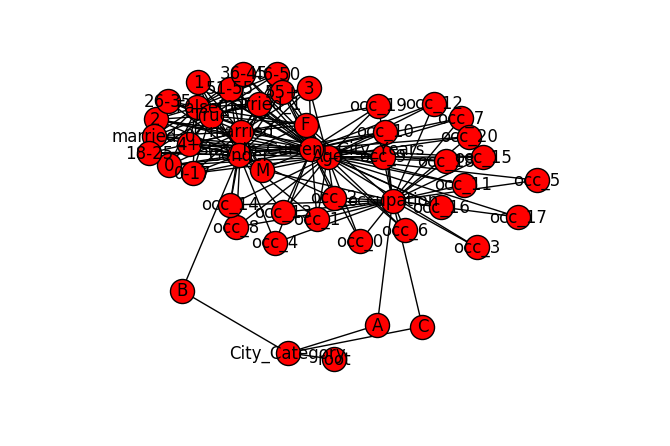

In [270]:
nx.draw_spring(treeGraph,with_labels=True)
plt.show()